In [16]:
# Load EDA Packages
import pandas as pd
import numpy as np


In [17]:
# Load Data Via Packages
!pip install seaborn
import seaborn as sns


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
# Load Text Cleaning Packages
!pip install neattext
import neattext.functions as nfx


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
# Load ML Packages
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [20]:
# Load Dataset
df = pd.read_csv("tweet_emotions.csv")

In [21]:
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956968416,neutral,@dannycastillo We want to trade with someone w...
4,1956968487,sadness,"I should be sleep, but im not! thinking about ..."


In [22]:
# Value Counts
df['sentiment'].value_counts()

sentiment
neutral      8638
happiness    5209
sadness      5165
love         3842
hate         1323
empty         827
anger         110
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

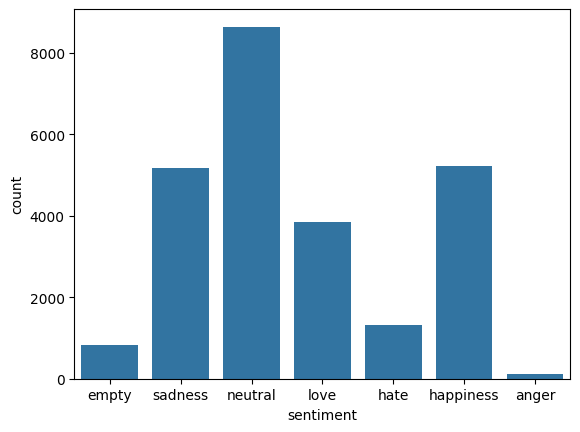

In [23]:
# Plot
sns.countplot(x='sentiment',data=df)

KeyError: 'actual_ratings'

In [24]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [25]:
df['Clean_content'] = df['content'].apply(nfx.remove_userhandles)


In [26]:
df['Clean_Text'] = df['content'].apply(nfx.remove_stopwords)

In [27]:
df

,tweet_id,sentiment,content,Clean_content,Clean_Text
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,i know i was listenin to bad habit earlier ...,@tiffanylue know listenin bad habit earlier st...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,Layin n bed with a headache ughhhh...waitin o...,Layin n bed headache ughhhh...waitin call...
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...
3,1956968416,neutral,@dannycastillo We want to trade with someone w...,We want to trade with someone who has Housto...,"@dannycastillo want trade Houston tickets, will."
4,1956968487,sadness,"I should be sleep, but im not! thinking about ...","I should be sleep, but im not! thinking about ...","sleep, im not! thinking old friend want. he's ..."
...,...,...,...,...,...
25109,1753918954,neutral,@JohnLloydTaylor,,@JohnLloydTaylor
25110,1753919001,love,Happy Mothers Day All my love,Happy Mothers Day All my love,Happy Mothers Day love
25111,1753919005,love,Happy Mother's Day to all the mommies out ther...,Happy Mother's Day to all the mommies out ther...,"Happy Mother's Day mommies there, woman man lo..."
25112,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY...,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP...


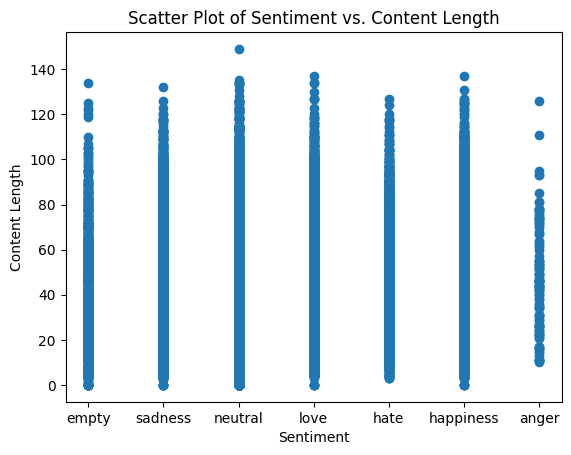

In [33]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import neattext.functions as nfx

# Load dataset from CSV file
df = pd.read_csv('tweet_emotions.csv')

# Clean the 'content' column to remove user handles and stopwords
df['Clean_content'] = df['content'].apply(nfx.remove_userhandles)
df['Clean_content'] = df['Clean_content'].apply(nfx.remove_stopwords)

# Assuming you want to plot the length of the cleaned content
df['Content_Length'] = df['Clean_content'].apply(len)

# Scatter plot of sentiment vs. content length
plt.scatter(df['sentiment'], df['Content_Length'])

# Adding title and labels
plt.title('Scatter Plot of Sentiment vs. Content Length')
plt.xlabel('Sentiment')
plt.ylabel('Content Length')

# Display the plot
plt.show()

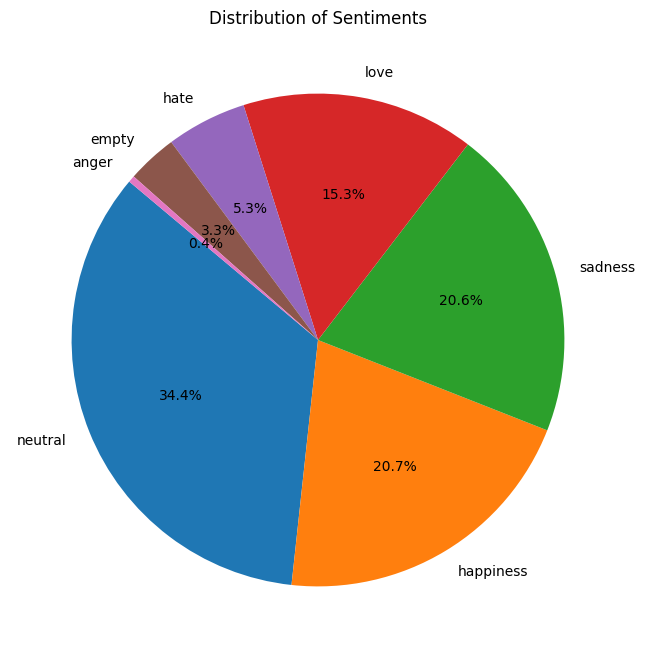

In [34]:
# Calculate the distribution of sentiments
sentiment_counts = df['sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiments')
plt.show()

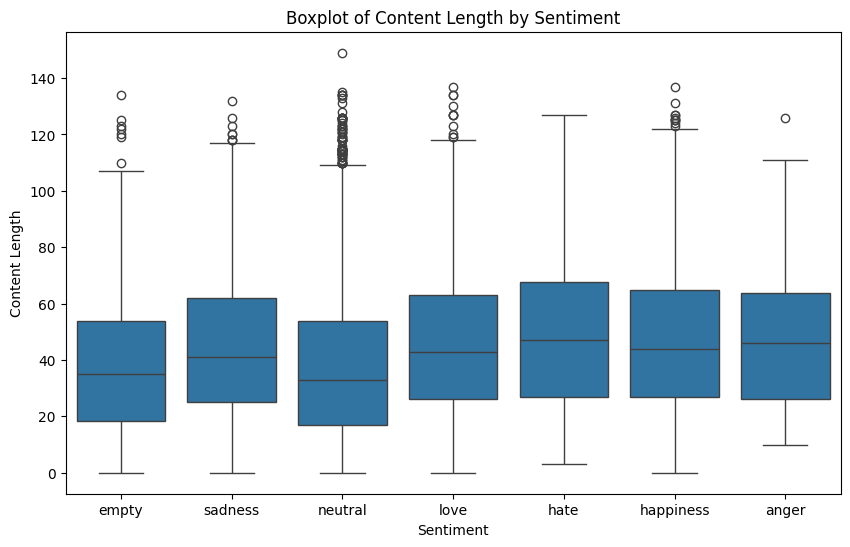

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import neattext.functions as nfx

# Load dataset from CSV file
df = pd.read_csv('tweet_emotions.csv')

# Clean the 'content' column to remove user handles and stopwords
df['Clean_content'] = df['content'].apply(nfx.remove_userhandles)
df['Clean_content'] = df['Clean_content'].apply(nfx.remove_stopwords)

# Assuming you want to plot the length of the cleaned content
df['Content_Length'] = df['Clean_content'].apply(len)

# Create a boxplot of content length by rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='Content_Length', data=df)

# Adding title and labels
plt.title('Boxplot of Content Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Content Length')

# Display the plot
plt.show()
